## Work
1. 試改變 monitor "Validation Accuracy" 並比較結果
2. 調整 earlystop 的等待次數至 10, 25 並比較結果

In [1]:
# import os
import keras
import matplotlib.pyplot as plt
%matplotlib inline


# Disable GPU
# os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [14]:
from keras.layers import BatchNormalization

def build_mlp(input_shape, output_units = 10, num_neurons = [512, 256, 128]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu",
                                   name = "hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units = n_units, activation="relu",
                                   name = "hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
        
    out = keras.layers.Dense(units=output_units, activation="softmax",
                             name = "output_layer")(x)
    model = keras.models.Model(inputs = [input_layer], outputs = [out])
    
    return model

In [7]:
"""Code Here
設定超參數
"""
Learning_rate = 1e-3
Epochs = 50
Batch_size = 1024
Momentum = 0.95

In [9]:
# 載入 Callbacks
"""Code Here
設定 callbacks: Earlystop
"""
from keras.callbacks import EarlyStopping

earlystop = []
Times = [5, 10, 25]
for i, time in enumerate(Times):
    es = EarlyStopping(monitor="val_accuracy", patience=time, verbose=1)
    earlystop.append(es)


In [20]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for i, es in enumerate(earlystop):
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr = Learning_rate, nesterov = True, momentum=Momentum)
    model.compile(loss = "categorical_crossentropy", metrics = ["accuracy"],
                  optimizer = optimizer)
    model.fit(x_train, y_train, epochs= Epochs, batch_size = Batch_size,
              validation_data = (x_test, y_test), shuffle=True, callbacks = [es])
    

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-EarlyStop_patience-%s-times" %str(Times[i])
    results[exp_name_tag] = {"train_loss": train_loss,
                             "valid_loss": valid_loss,
                             "train_acc": train_acc,
                             "valid_acc": valid_acc}

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_12 (Batc (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_13 (Batc (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_14 (Batc (None, 128)               512 

50000/50000 [==============================] - 2s 35us/step - loss: 1.4524 - accuracy: 0.4958 - val_loss: 1.5982 - val_accuracy: 0.4395
Epoch 7/50
50000/50000 [==============================] - 2s 35us/step - loss: 1.4131 - accuracy: 0.5101 - val_loss: 1.5688 - val_accuracy: 0.4428
Epoch 8/50
50000/50000 [==============================] - 2s 36us/step - loss: 1.3771 - accuracy: 0.5228 - val_loss: 1.5289 - val_accuracy: 0.4608
Epoch 9/50
50000/50000 [==============================] - 2s 34us/step - loss: 1.3425 - accuracy: 0.5338 - val_loss: 1.5017 - val_accuracy: 0.4689
Epoch 10/50
50000/50000 [==============================] - 2s 32us/step - loss: 1.3124 - accuracy: 0.5465 - val_loss: 1.4887 - val_accuracy: 0.4764
Epoch 11/50
50000/50000 [==============================] - 2s 32us/step - loss: 1.2846 - accuracy: 0.5569 - val_loss: 1.4829 - val_accuracy: 0.4734
Epoch 12/50
50000/50000 [==============================] - 2s 37us/step - loss: 1.2560 - accuracy: 0.5668 - val_loss: 1.4756 - 

50000/50000 [==============================] - 2s 33us/step - loss: 1.2794 - accuracy: 0.5551 - val_loss: 1.4729 - val_accuracy: 0.4763
Epoch 12/50
50000/50000 [==============================] - 2s 35us/step - loss: 1.2542 - accuracy: 0.5651 - val_loss: 1.4704 - val_accuracy: 0.4787
Epoch 13/50
50000/50000 [==============================] - 2s 32us/step - loss: 1.2279 - accuracy: 0.5749 - val_loss: 1.4627 - val_accuracy: 0.4848
Epoch 14/50
50000/50000 [==============================] - 2s 32us/step - loss: 1.2042 - accuracy: 0.5821 - val_loss: 1.4571 - val_accuracy: 0.4823
Epoch 15/50
50000/50000 [==============================] - 2s 34us/step - loss: 1.1817 - accuracy: 0.5915 - val_loss: 1.4440 - val_accuracy: 0.4899
Epoch 16/50
50000/50000 [==============================] - 2s 33us/step - loss: 1.1571 - accuracy: 0.6014 - val_loss: 1.4549 - val_accuracy: 0.4903
Epoch 17/50
50000/50000 [==============================] - 2s 32us/step - loss: 1.1352 - accuracy: 0.6094 - val_loss: 1.4454

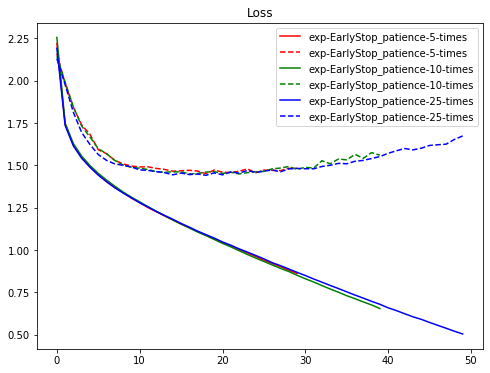

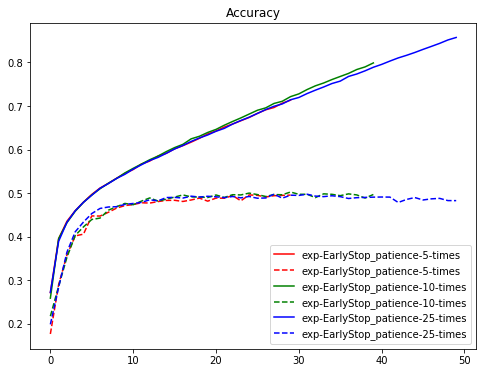

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b"]

plt.figure(figsize = (8, 6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]["train_loss"])), results[cond]["train_loss"],
             "-", label = cond, c = color_bar[i])
    plt.plot(range(len(results[cond]["valid_loss"])), results[cond]["valid_loss"],
             "--", label = cond, c = color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize = (8, 6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]["train_acc"])), results[cond]["train_acc"],
             "-", label = cond, c = color_bar[i])
    plt.plot(range(len(results[cond]["valid_acc"])), results[cond]["valid_acc"],
             "--", label = cond, c = color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()